In [2]:
import os
import pathlib as path
from PIL import Image

In [3]:
def get_concat_h_multi_resize(im_list, resample=Image.LANCZOS):
    min_height = min(im.height for im in im_list)
    im_list_resize = [im.resize((int(im.width * min_height / im.height), min_height),resample=resample)
                      for im in im_list]
    total_width = sum(im.width for im in im_list_resize)
    dst = Image.new('RGB', (total_width, min_height))
    pos_x = 0
    for im in im_list_resize:
        dst.paste(im, (pos_x, 0))
        pos_x += im.width
    return dst

def get_concat_v_multi_resize(im_list, resample=Image.LANCZOS):
    min_width = min(im.width for im in im_list)
    im_list_resize = [im.resize((min_width, int(im.height * min_width / im.width)),resample=resample)
                      for im in im_list]
    total_height = sum(im.height for im in im_list_resize)
    dst = Image.new('RGB', (min_width, total_height))
    pos_y = 0
    for im in im_list_resize:
        dst.paste(im, (0, pos_y))
        pos_y += im.height
    return dst

def get_concat_tile_resize(im_list_2d, resample=Image.LANCZOS):
    im_list_v = [get_concat_h_multi_resize(im_list_h, resample=resample) for im_list_h in im_list_2d]
    return get_concat_v_multi_resize(im_list_v, resample=resample)

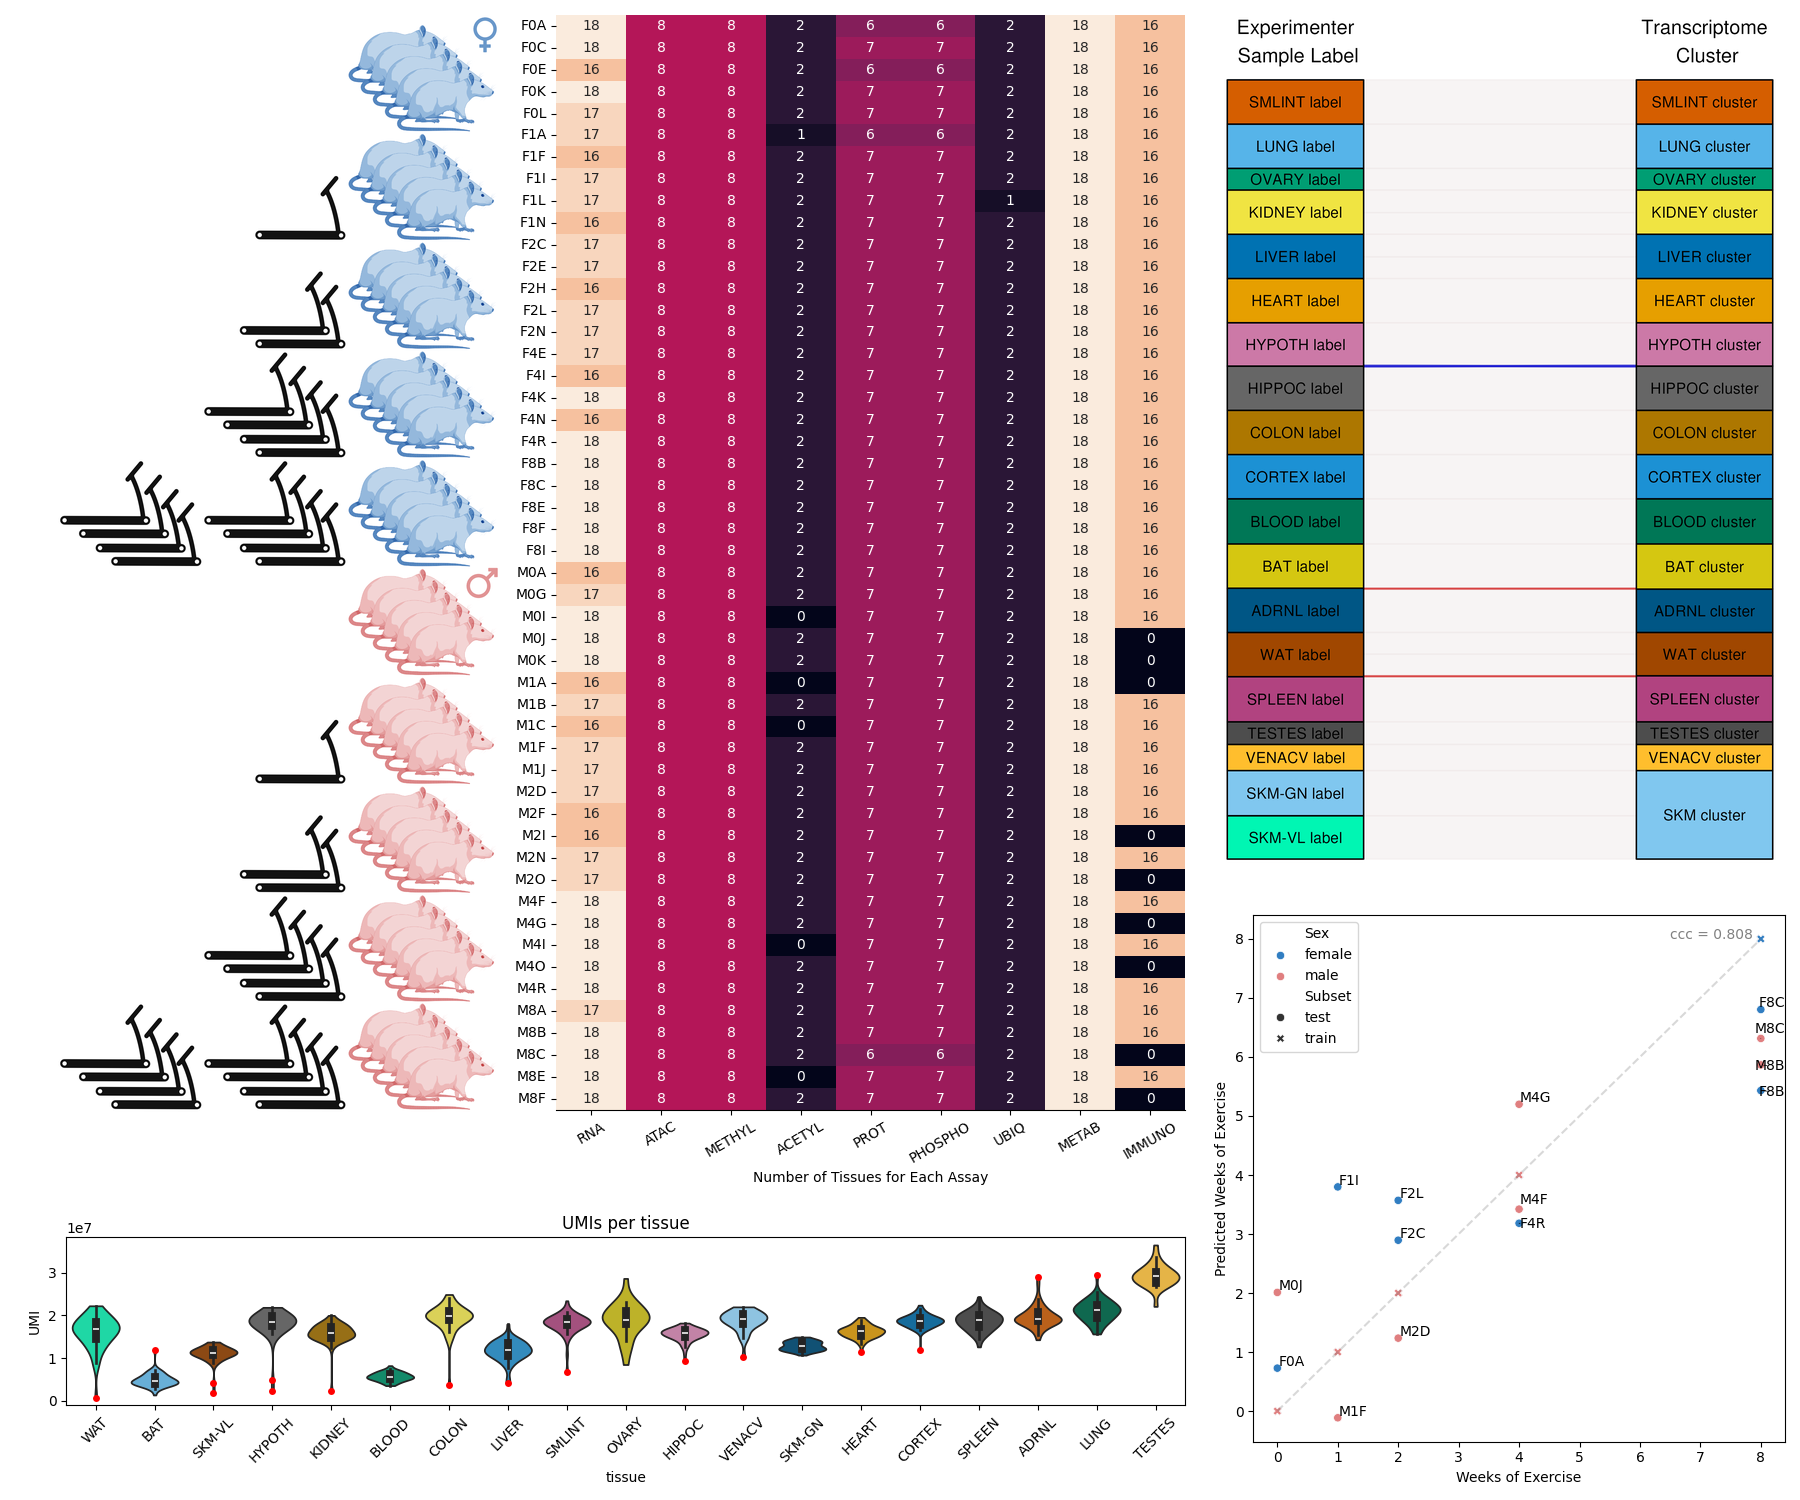

In [5]:
big_img = get_concat_h_multi_resize([
    get_concat_v_multi_resize([
        get_concat_h_multi_resize([Image.open('fig_1aa.png'), Image.open('fig_1ab.png')]), 
        Image.open('fig_1b.png')]), 
    get_concat_v_multi_resize([Image.open('fig_1c.png'), Image.open('fig_1d.png')])
])
big_img.save('Figure_1.png')
big_img

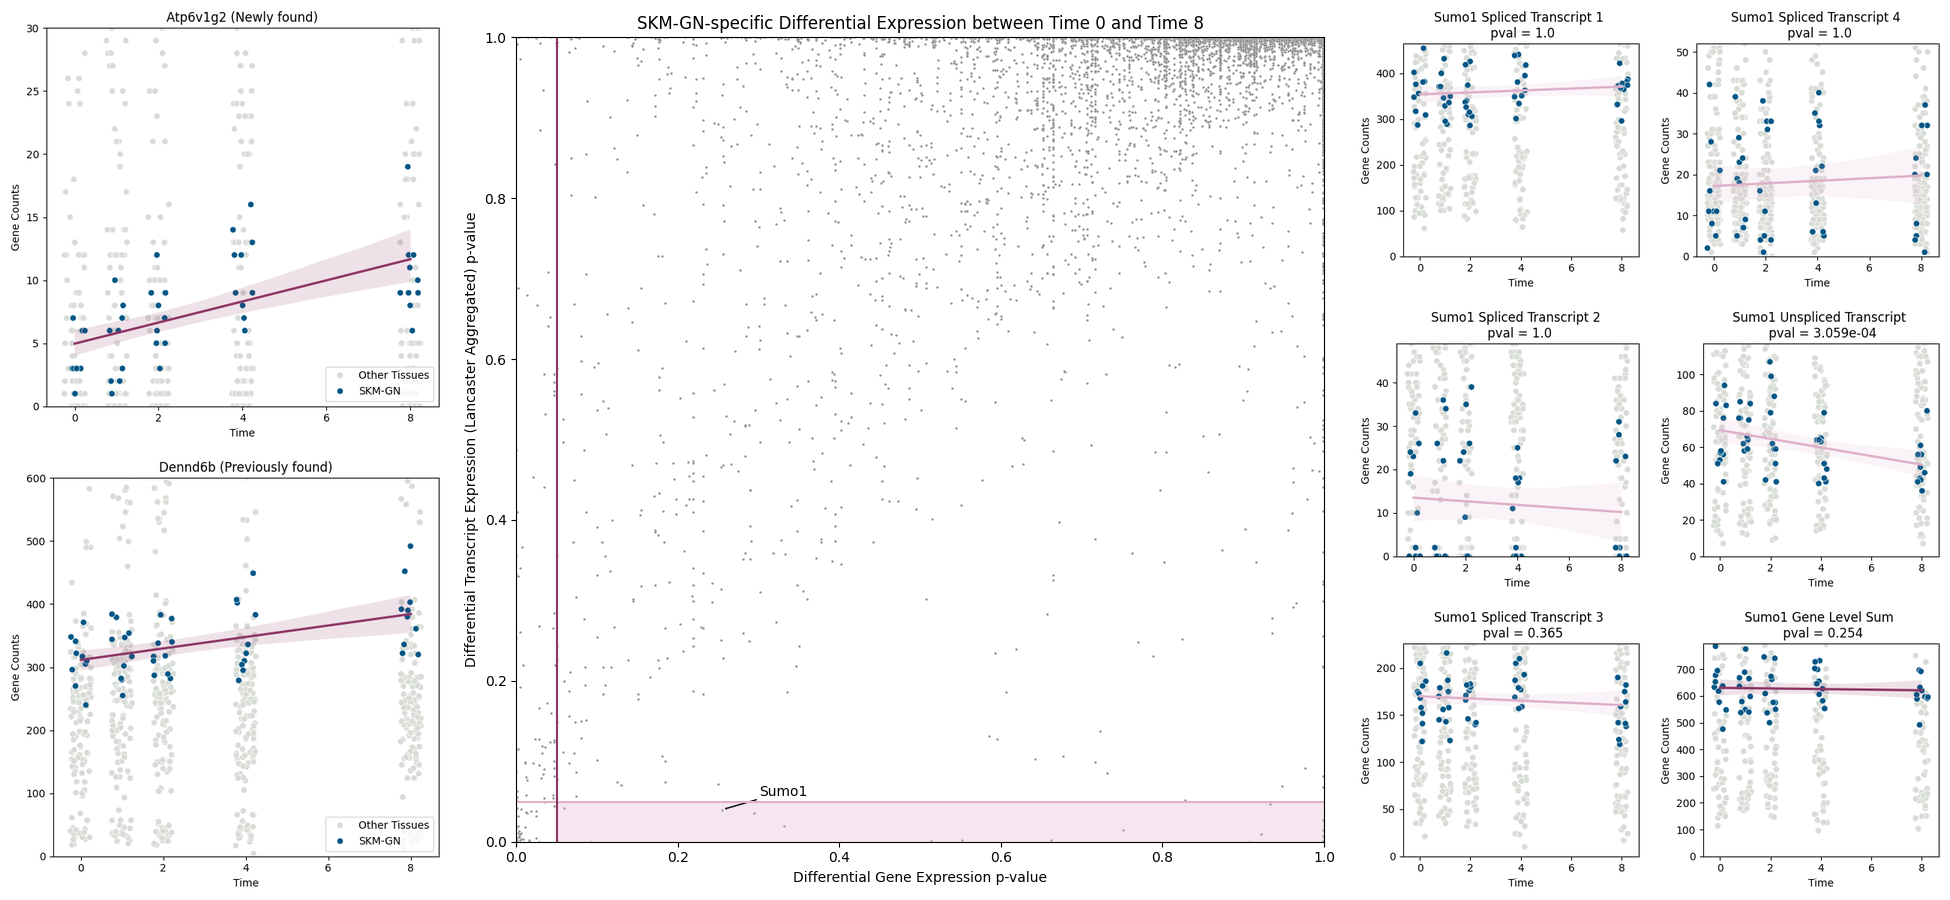

In [5]:
big_img = get_concat_h_multi_resize([
    get_concat_h_multi_resize([
        get_concat_v_multi_resize(
            [Image.open(f'fig_2a.png'), Image.open(f'fig_2b.png')]
        ), 
        Image.open(f'fig_2c.png')]),
    get_concat_h_multi_resize([
        get_concat_v_multi_resize([
        get_concat_v_multi_resize([Image.open(f'fig_2d.png'),Image.open(f'fig_2e.png')]),
        Image.open(f'fig_2f.png')
    ]), get_concat_v_multi_resize([
        get_concat_v_multi_resize([Image.open(f'fig_2g.png'),Image.open(f'fig_2h.png')]),
        Image.open(f'fig_2i.png')
    ])
    ])
])
big_img.save('Figure_2.png')
big_img

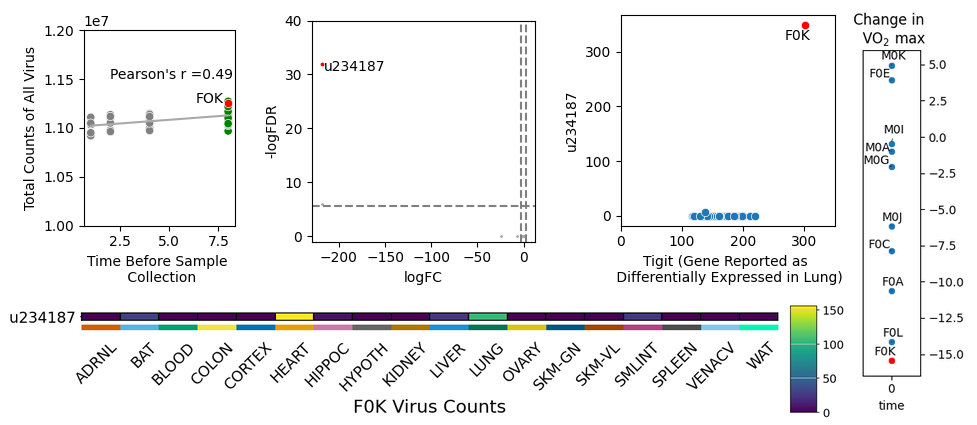

In [ ]:
# replace colorbar
im = Image.open(f'fig_3c.png')
width, height = im.size
im1 = im.crop((0, 0, width*(11/12), height))

big_img = get_concat_h_multi_resize([
    get_concat_v_multi_resize([
        get_concat_h_multi_resize([Image.open(f'fig_3a.png'), 
    get_concat_h_multi_resize([Image.open(f'fig_3b.png'), Image.open(f'fig_3d.png')])
                                  ]),
                                   get_concat_h_multi_resize([im1, Image.open('fig_3c_cbar.png')])
    ]),
    Image.open(f'fig_3e.png')
    
])
big_img.save('Figure_3.png')
big_img

## Supplementals

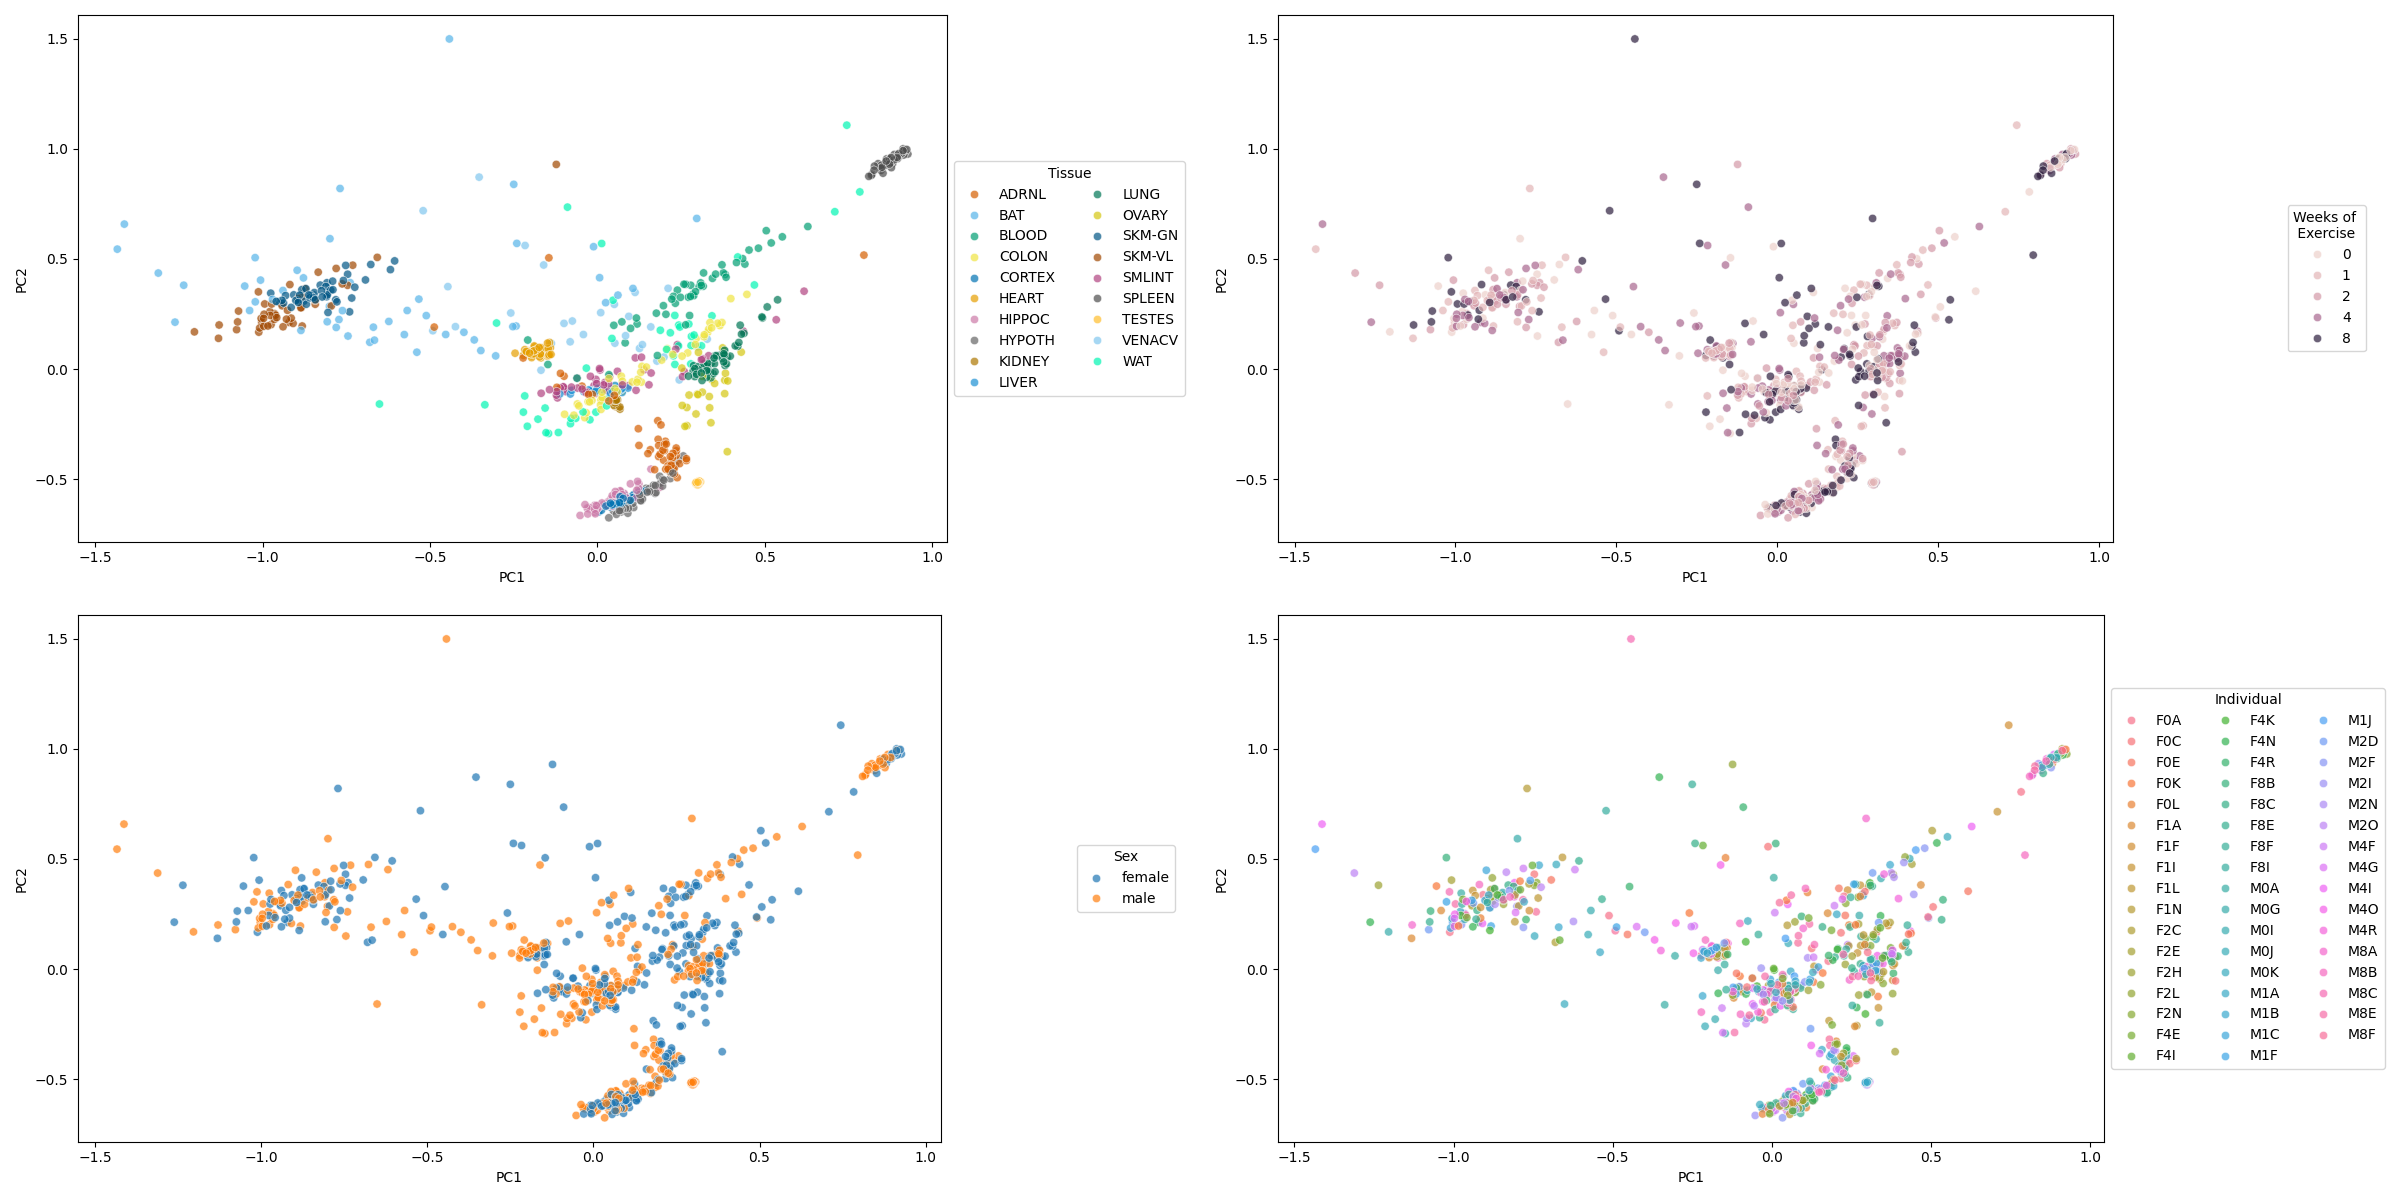

In [8]:
big_img = get_concat_v_multi_resize([get_concat_h_multi_resize([Image.open('supp_fig_3a.png'), Image.open('supp_fig_3b.png')]), 
get_concat_h_multi_resize([Image.open('supp_fig_3c.png'), Image.open('supp_fig_3d.png')])])

big_img.save('Supplemental_Figure_3.png')
big_img

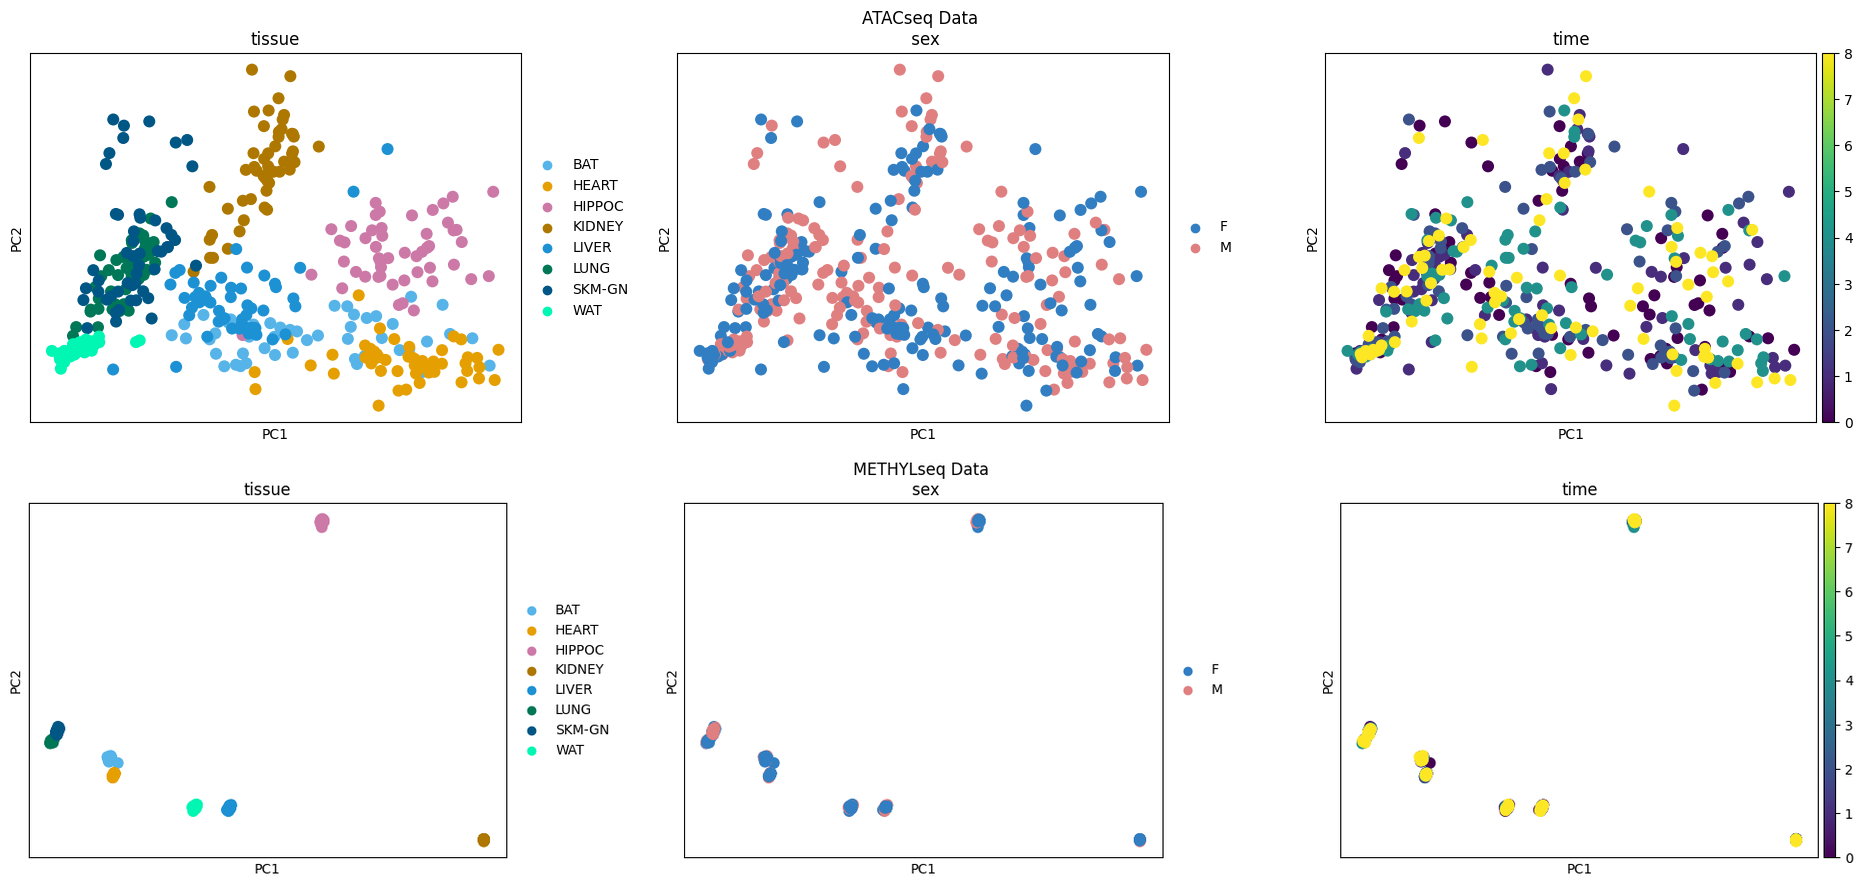

In [5]:
big_img = get_concat_v_multi_resize([Image.open('supp_fig_5a.png'), Image.open('supp_fig_5b.png')])

big_img.save('Supplemental_Figure_5.png')
big_img

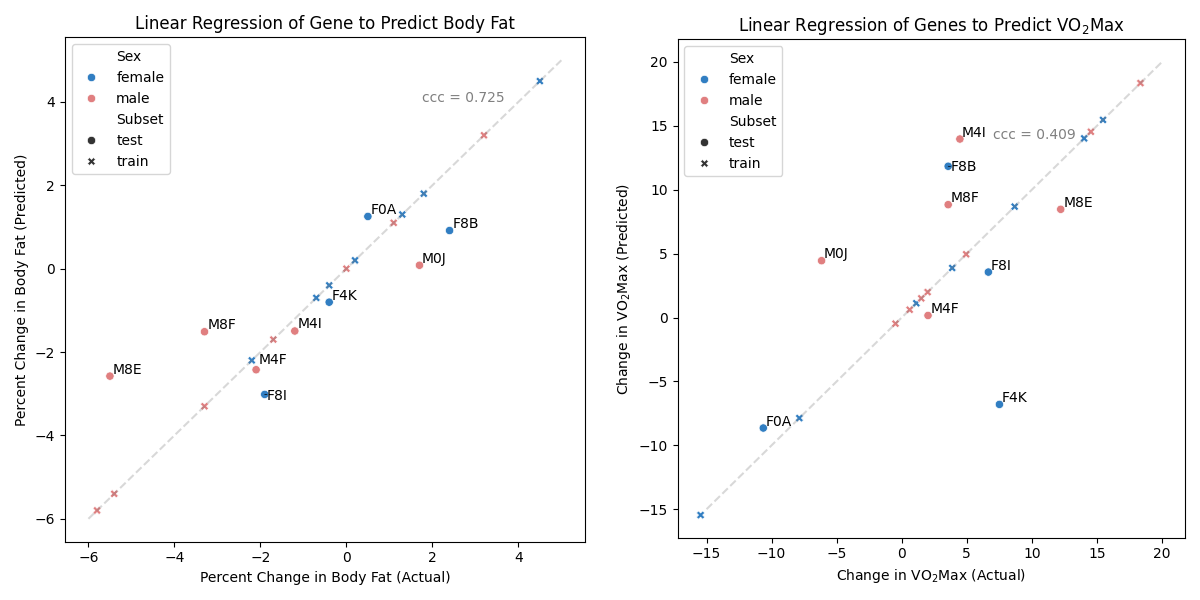

In [9]:
big_img = get_concat_h_multi_resize([Image.open('supp_fig_8a.png'), Image.open('supp_fig_8b.png')])

big_img.save('Supplemental_Figure_8.png')
big_img

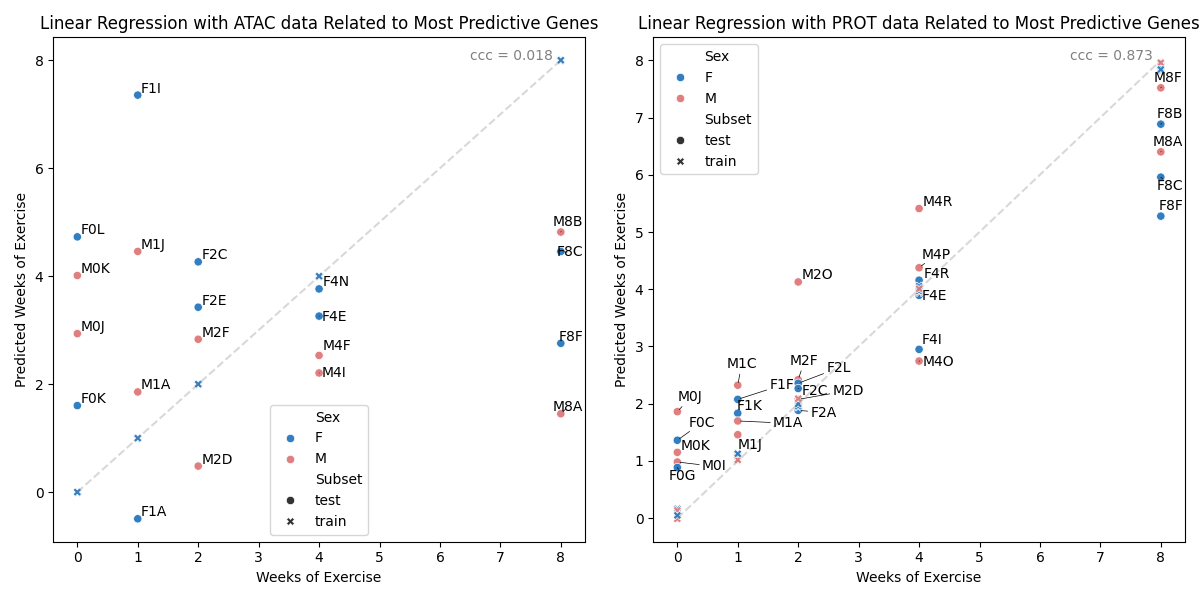

In [10]:
big_img = get_concat_h_multi_resize([Image.open('supp_fig_10a.png'), Image.open('supp_fig_10b.png')])

big_img.save('Supplemental_Figure_10.png')
big_img